### Exercise 4

In [38]:
id1 = "332391820"
id2 = "313475808"

name_student_1 = "Noam Sitbon"
name_student_2 = "Yedidia Friedheim"

import pandas as pd
df = pd.DataFrame([name_student_1 + " , " + id1 ,name_student_2 + " , " + id2 ])
df.to_clipboard(index=False,header=False)
df

,0
0,"Noam Sitbon , 332391820"
1,"Yedidia Friedheim , 313475808"


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [40]:
url = "https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv"
nba = pd.read_csv(url)

def acc(x,y,model):
    pred=model.predict(x)
    y_alt=y.values
    return (pred == y_alt).mean()

### Question 1

In [41]:
my_list=["Age","Height","Weight","Salary"]
nba=nba.dropna().reset_index() #drop empty values and reset index
nba[my_list].head(3)

,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
2,22.0,6-5,185.0,1148640.0


### Question 2

In [42]:
nba["Height"]=nba["Height"].str.replace("-",".").astype("float") #replace "-" by "." and convert "height" to float 
nba[my_list].head(3)

,Age,Height,Weight,Salary
0,25.0,6.2,180.0,7730337.0
1,25.0,6.6,235.0,6796117.0
2,22.0,6.5,185.0,1148640.0


### Question 3

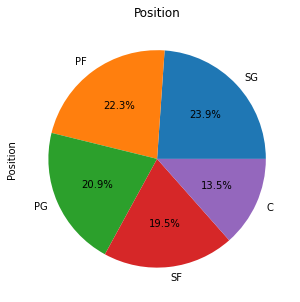

In our opinion we can see that the data is more precise with the countplot


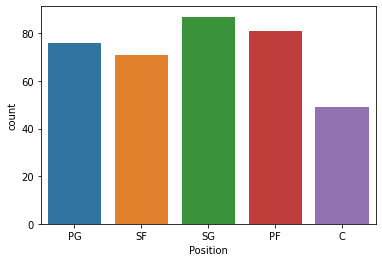

In [43]:
plt.figure(1, figsize=(5,5))  #decide the size of the figure
plt.title("Position") #title
nba["Position"].value_counts().plot.pie(autopct="%1.1f%%") #making pieplot for values of "Position"
plt.show()
sns.countplot(x="Position",data=nba) #making counplot for "Position"
print("In our opinion we can see that the data is more precise with the countplot" )


### Question 4

In [44]:
features=["Age","Height","Weight"]
X=nba[features]
Y=nba["Salary"]
X_train, x_test, Y_train, y_test=train_test_split(X, Y, test_size=0.3,random_state=42) #split the data 70% train and 30% test

In [45]:
X_train.head(5) 

,Age,Height,Weight
268,22.0,6.70,232.0
232,26.0,6.60,220.0
157,26.0,6.30,208.0
19,21.0,6.11,200.0
147,33.0,6.90,245.0


In [46]:
y_test.head()

193    2085671.0
33     1636842.0
15     6300000.0
347    3075880.0
57     3553917.0
Name: Salary, dtype: float64

### Question 5

In [47]:
model1=DecisionTreeRegressor(random_state=42)  #make a model tree
model1.fit(X_train,Y_train) #fit the model with X_train,Y_train
print("We decide to use the model TreeRegressor because in our case we deal with continuous labels, we were asked to predict the salary ")

We decide to use the model TreeRegressor because in our case we deal with continuous labels, we were asked to predict the salary 


### Question 6

In [48]:
prediction=model1.predict(x_test)  #make prediction of x_test with model1
df=pd.DataFrame(columns=["Salary","Predictions"]) #add columns Salary, Predictions
df["Salary"]=y_test
df=df.reset_index(drop=True) #reset index
df["Predictions"]=pd.Series(prediction)
print("The acc of the tree is: ",acc(x_test,y_test,model1))
print("The mse is: ",mse(prediction,y_test,squared=False))
df



The acc of the tree is:  0.01818181818181818
The mse is:  7102040.645252005


,Salary,Predictions
0,2085671.0,2500000.0
1,1636842.0,3333333.0
2,6300000.0,5378974.0
3,3075880.0,16407500.0
4,3553917.0,1159680.0
...,...,...
105,2841960.0,5152440.0
106,1320000.0,14260870.0
107,1348440.0,1535880.0
108,2489530.0,926042.5


### Question 7

In [49]:
nba["Position"]=nba["Position"].astype("category").cat.codes #change the category of "Position" in order to add it to our features
nba["Position"]=nba["Position"].astype("float")


In [50]:
features2=["Age","Height","Weight","Position"]
X2=nba[features2]
Y2=nba["Salary"]
X2_train, x2_test, Y2_train, y2_test=train_test_split(X2, Y2, test_size=0.3,random_state=42) 
#split the data 70% train and 30% test

model2=DecisionTreeRegressor(random_state=42)   #make a model tree
model2.fit(X2_train,Y2_train)   #fit the model with X2_train,Y2_train

prediction2=model2.predict(x2_test)  #make prediction of x2_test with model2
df2=pd.DataFrame(columns=["Salary","Predictions"])  #add columns Salary, Predictions
df2["Salary"]=y2_test
df2=df2.reset_index(drop=True)
df2["Predictions"]=prediction2
print("The acc of the tree is: ",acc(x2_test,y2_test,model2))
print("The mse is: ",mse(prediction2,y2_test,squared=False))
df2

The acc of the tree is:  0.00909090909090909
The mse is:  6464421.644958386


,Salary,Predictions
0,2085671.0,2500000.0
1,1636842.0,10449438.0
2,6300000.0,5378974.0
3,3075880.0,1007026.0
4,3553917.0,1252440.0
...,...,...
105,2841960.0,6331404.0
106,1320000.0,1270964.0
107,1348440.0,1678600.0
108,2489530.0,1007026.0


### Question 8

In [51]:
model3 =DecisionTreeRegressor(max_depth=1,random_state=42) #we decide to use a depth of 1 for this tree
model3.fit(X2_train,Y2_train)
prediction3=model3.predict(x2_test)

print("The acc of the tree is: ",acc(x_test,y_test,model1))
print("The mse is: ",mse(prediction3,y2_test,squared=False),", this lower than the last mse so we can conclude that with depth of 1 we improve the model ")



The acc of the tree is:  0.01818181818181818
The mse is:  4811537.183282451 , this lower than the last mse so we can conclude that with depth of 1 we improve the model 
